In [89]:
import torch
import torchvision
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F

In [90]:
#You can change the download to True if you don't have MNIST in your device
train=datasets.MNIST("",train=True,download=False,transform=transforms.Compose([transforms.ToTensor()]))

In [91]:
test=datasets.MNIST("",train=False,download=False,transform=transforms.Compose([transforms.ToTensor()]))
batch=16

In [92]:
train_set=torch.utils.data.DataLoader(train,batch_size=batch,shuffle=True)
test_set=torch.utils.data.DataLoader(test,batch_size=batch,shuffle=True)

In [93]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv=nn.Sequential(
        nn.Conv2d(1,4,4,2),
        nn.ReLU(),
        nn.Conv2d(4,8,5,2),
        nn.ReLU(),
        )
        self.fcc=nn.Sequential(
        nn.Linear(200,96),
        nn.Linear(96,32),
        nn.Linear(32,10),
        )
    def forward(self, x):
        x=self.conv(x)
        x=x.view(x.shape[0],-1)
        x=self.fcc(x)
        return x

net = Net()
net

Net(
  (conv): Sequential(
    (0): Conv2d(1, 4, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(2, 2))
    (3): ReLU()
  )
  (fcc): Sequential(
    (0): Linear(in_features=200, out_features=96, bias=True)
    (1): Linear(in_features=96, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [94]:
import torch.optim as optim
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [95]:
loss_list=[]
correct=0
total=0            
for epoch in range(10):
    for data in train_set:  
        X, Y = data  
        net.zero_grad()
        output = net(X) 
        loss = loss_function(output, Y) 
        loss_list.append(loss.item())
        loss.backward()  
        optimizer.step()
        for idx, i in enumerate(output):
            if torch.argmax(i) == Y[idx]:
                correct += 1
            total += 1
    print("For iteration:",epoch+1,"Loss is:",loss.item(),"Accuracy is:",(correct/total)*100)  

For iteration: 1 Loss is: 0.20548643171787262 Accuracy is: 91.90833333333333
For iteration: 2 Loss is: 0.6356586217880249 Accuracy is: 94.36166666666666
For iteration: 3 Loss is: 0.1279747188091278 Accuracy is: 95.32388888888889
For iteration: 4 Loss is: 0.02993927150964737 Accuracy is: 95.88458333333332
For iteration: 5 Loss is: 0.002998314332216978 Accuracy is: 96.25266666666667
For iteration: 6 Loss is: 0.04681737720966339 Accuracy is: 96.51805555555556
For iteration: 7 Loss is: 0.11408833414316177 Accuracy is: 96.7304761904762
For iteration: 8 Loss is: 0.004910278134047985 Accuracy is: 96.895
For iteration: 9 Loss is: 0.00044270194484852254 Accuracy is: 97.0325925925926
For iteration: 10 Loss is: 0.00043528794776648283 Accuracy is: 97.14699999999999


In [96]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_set:
        X, Y = data
        output = net(X)
        #print(output)
        for idx, i in enumerate(output):
            if torch.argmax(i) == Y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", (correct/total)*100)

Accuracy:  98.13


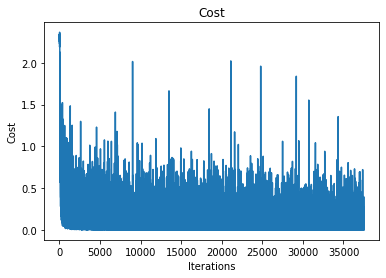

In [97]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost')
plt.show()

In [98]:
#NOW, TESTING THE ABOVE CODE

Given Image is 8


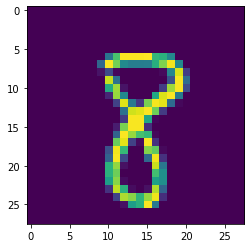

In [99]:
import numpy as np
train_set = datasets.MNIST('./data', train=True, download=False)
test_set = datasets.MNIST('./data', train=False, download=False)
train_img = train_set.data.numpy()
test_img = test_set.data.numpy()
img_tensor=transforms.ToTensor()
req=test_img[4545]
req=img_tensor(req)
req=req.view(1,1,28,28)
plt.imshow(np.squeeze(test_img[4545]))
output=net(req)
prediction=torch.argmax(output)
print("Given Image is",prediction.item())